## **CIFAR100 CNN MODEL**

In [33]:
# Importing Libraries

from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import cifar100
import numpy as np
from sklearn.metrics import confusion_matrix

### **IMPORTING DATASET FROM KERAS**

In [34]:
# download the dataset from source and divide into training and test set

(x_train,y_train),(x_test,y_test) = cifar100.load_data()

## **DATA PREPARATION AND VISUALIZATION**

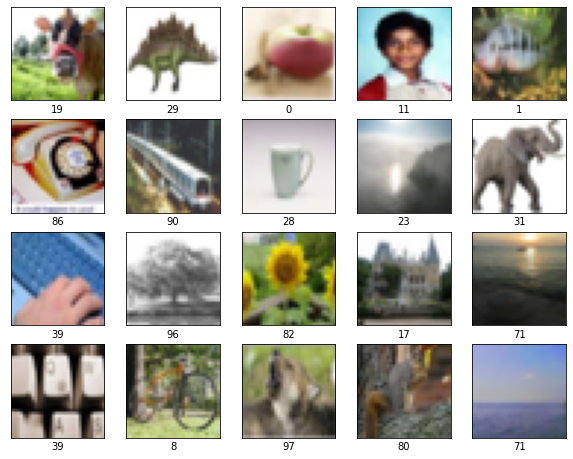

In [ ]:
# plot a sample from the training class

plt.figure(figsize=(10,10))
for image in range(0,20):
  i=image
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  j=i+0
  data_plot = x_train[j]
  plt.imshow(data_plot)
  plt.xlabel(str(y_train[j]))

plt.show()


In [ ]:
# normalizing the training and testing data

x_train = x_train/255
x_test = x_test/255

In [ ]:
# convert the 2d array output labels into 1D array
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

## **TRAIN THE MODEL**

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [ ]:
# Building model in Sequential fashion using KERAS

model = Sequential()

model.add(Conv2D(32,(3,3),padding='same', activation = 'relu', input_shape=(32,32,3), strides = (2,2)))
model.add(Conv2D(32,(3,3), activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2), padding = 'same', strides = (2,2)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(100, activation = 'softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)              

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)              

In [ ]:
history = model.fit(x_train,y_train, epochs=12,verbose=1, validation_data=(x_test, y_test))

Epoch 1/12
1563/1563 [==============================] - 49s 32ms/step - loss: 1.6171 - accuracy: 0.5478 - val_loss: 2.9554 - val_accuracy: 0.3424
Epoch 2/12
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5520 - accuracy: 0.5629 - val_loss: 3.0068 - val_accuracy: 0.3341
Epoch 3/12
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4909 - accuracy: 0.5746 - val_loss: 3.1138 - val_accuracy: 0.3261
Epoch 4/12
1563/1563 [==============================] - 51s 32ms/step - loss: 1.4383 - accuracy: 0.5888 - val_loss: 3.1399 - val_accuracy: 0.3327
Epoch 5/12
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3835 - accuracy: 0.6024 - val_loss: 3.2655 - val_accuracy: 0.3257
Epoch 6/12
1563/1563 [==============================] - 51s 32ms/step - loss: 1.3337 - accuracy: 0.6126 - val_loss: 3.2797 - val_accuracy: 0.3284
Epoch 7/12
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2851 - accuracy: 0.6260 - val_loss: 3.3897 -

## **EVALUATE THE MODEL**

In [ ]:
# Final evaluation of the model using testing data and get the accuracy

test_loss, test_acc =  model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 3.9889 - accuracy: 0.3175
test accuracy:  0.3174999952316284


In [ ]:
# Feedinf X_test data into the model and detemining what are the predicted classes going to be.

predict_x = model.predict(x_test) 
classes_x = np.argmax(predict_x,axis=1)
classes_x

array([49, 33, 34, ..., 51, 42, 70])

In [ ]:
y_test

array([49, 33, 72, ..., 51, 42, 70])

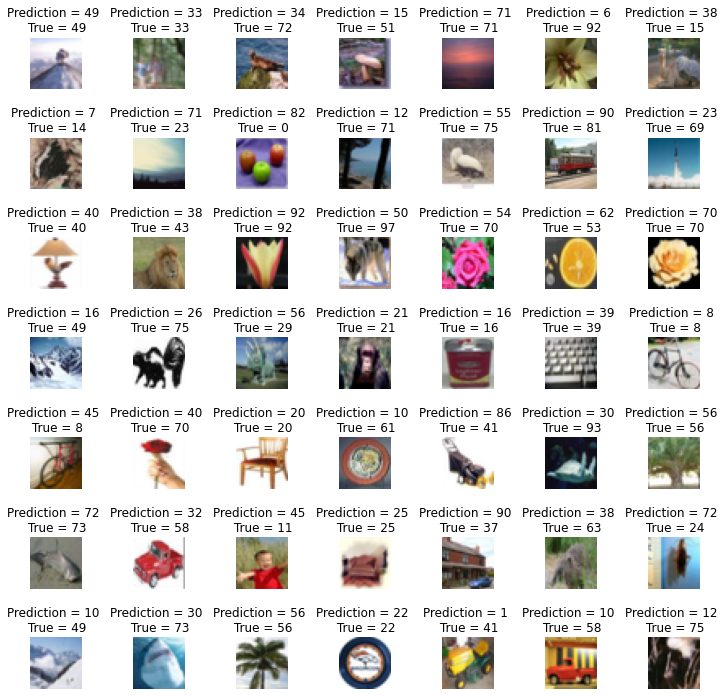

In [ ]:
# Printing matrix of 7 images for test data

from IPython.core.pylabtools import figsize
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(x_test[i])
  axes[i].set_title('Prediction = {} \n True = {}' .format(classes_x[i], y_test[i])) 
  axes[i].axis('off') 
  plt.subplots_adjust(hspace = 0.9)
  plt.subplots_adjust(wspace = 1)

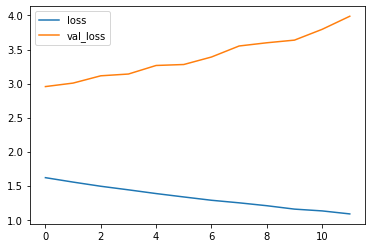

In [ ]:
# plot the training and validation accuracy at each epochs:

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

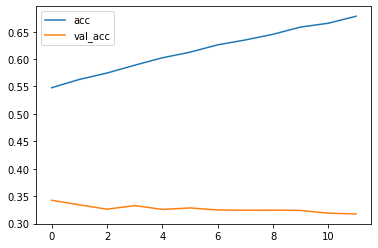

In [ ]:
# Plot accuracy per iteration

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

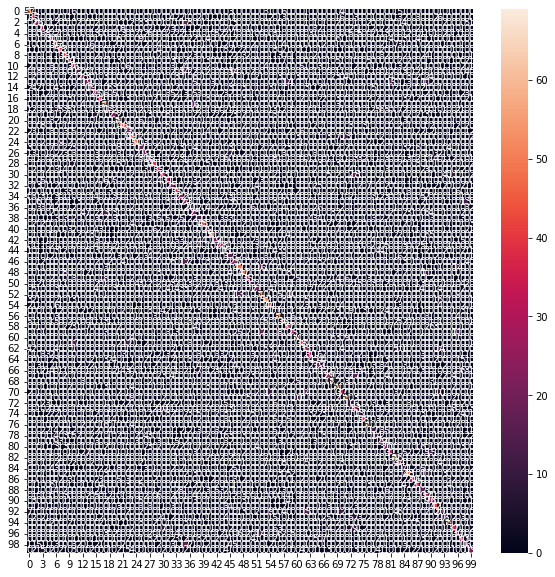

In [35]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, classes_x)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

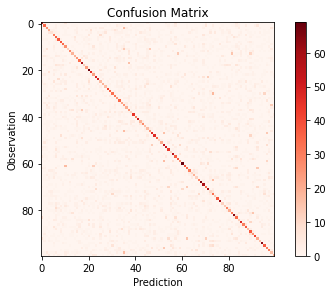

In [ ]:
# Confusion Matrix to summarize all the results in one location

def plot_confusion_matrix(cm, classes, normalize = True, title = 'Confusion Matrix', cmap=plt.cm.Reds):
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()

  if normalize:
    cm=cm.astype('float') / cm.sum(axis=1)[: np.newaxis]
  plt.tight_layout()
  plt.ylabel('Observation')
  plt.xlabel('Prediction')
Y_pred = model.predict(x_test)

# Convert prediction classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis= 1)
confusion_mtx= confusion_matrix(y_test, Y_pred_classes)

#plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(100))


